In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings

In [4]:
import scipy.stats as st
from scipy.stats._continuous_distns import _distn_names
import matplotlib

In [5]:
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
from numpy.random import rand

In [4]:
rv = st.binom(3000, 0.2)

In [5]:
rv.rvs(10)

array([572, 602, 618, 649, 616, 604, 598, 615, 581, 587])

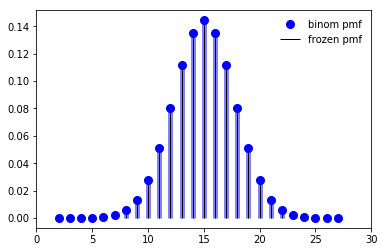

In [8]:
from scipy.stats import binom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

n, p = 30, 0.50
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

x = np.arange(binom.ppf(0.0000001, n, p), binom.ppf(0.9999999, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.xlim(0,n)
plt.show()

In [90]:
df = pd.read_csv('../experiments/exp13/run2/cat/eval_clonotypes/valid_ct.csv')

In [123]:
def f(a,b,c,d,e,f,g,h):
    output = list()
    for i in range(n_particles):
        flt = df[(df.umi_count_mhc >= a[i]) & (df.delta_umi_mhc >= b[i]) &
                 (df.umi_count_cd8 >= c[i]) & (df.delta_umi_cd8 >= d[i]) &
                 (df.umi_count_TRA >= e[i]) & (df.delta_umi_TRA >= f[i]) &
                 (df.umi_count_TRB >= g[i]) & (df.delta_umi_TRB >= h[i]) &
                 (df.valid_ct == True)]
        if len(flt) == 0:
            output.append(0)
        else:
            acc = flt.train_label.sum() / len(flt)
            rat = len(flt) / len(df[df.valid_ct == True])
            n = 2

            output.append(-(acc * n + rat) / (n+1))
        
    return np.array(output)

In [125]:
#https://machinelearningmastery.com/a-gentle-introduction-to-particle-swarm-optimization/
# Hyper-parameter of the algorithm
c1 = c2 = 0.1
w = 0.8
 
# Create particles
n_particles = 1000
n_parameters = 8
np.random.seed(100)

init = np.array([[30]*n_particles,
          [30]*n_particles,
          [100]*n_particles,
          [30]*n_particles,
          [4]*n_particles,
          [20]*n_particles,
          [12]*n_particles,
          [20]*n_particles])
X = np.round(np.random.rand(n_parameters, n_particles) * init)
V = np.random.randn(n_parameters, n_particles) * 0.8
 
# Initialize data
pbest = X
pbest_obj = f(X[0], X[1], X[2], X[3], X[4], X[5], X[6], X[7])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()
 
def update():
    "Function to do one iteration of particle swarm optimization"
    global V, X, pbest, pbest_obj, gbest, gbest_obj
    # Update params
    r1, r2 = np.random.rand(2)
    V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
    X = np.round(X + V)
    obj = f(X[0], X[1], X[2], X[3], X[4], X[5], X[6], X[7])
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()
    
    pbest_std = np.std(pbest, axis=1).mean()
    print(gbest)
    print(gbest_obj)
    print(pbest_std)
    
    return pbest_std

In [126]:
prev_std = None
list_std = list
for r in range(100):
    curr_std = update()
    
    if curr_std == prev_std:
        list_std.append(curr_std)
    else:
        list_std = list()
        
    if len(list_std) == 10:
        break
        
    prev_std = curr_std

[ 8. 22. 81.  4. -0. -0.  1.  3.]
-0.8366413211492998
8.285705010791085
[ 6. 12. 94. 14.  0. -0.  2.  8.]
-0.8536732456140351
7.69714308944539
[ 9.  6. 34.  4. -2.  0.  2. 11.]
-0.8590576005453306
7.044146477373583
[ 9.  6. 34.  4. -2.  0.  2. 11.]
-0.8590576005453306
5.650309231918726
[ 9.  8. 44.  4. -3. -1.  2.  8.]
-0.869718567251462
4.143550478341095
[ 9.  8. 44.  4. -3. -1.  2.  8.]
-0.869718567251462
2.7618479325976084
[ 6.  9. 54.  5.  0. -1.  2.  7.]
-0.8707784547841786
1.642915322907927
[ 7.  8. 52.  1. -3. -0.  2.  7.]
-0.8764254635962911
1.288551947313077
[ 5.  8. 41.  1. -4. -0.  2.  7.]
-0.8807734480431848
1.5990149500679425
[ 3.  4. 44.  2. -2. -3.  1.  6.]
-0.8834357923497268
2.049520907767623
[ 2.  4. 43. -2. -4. -2.  1.  8.]
-0.886220472440945
2.3527670030131835
[ 2.  1. 53.  1. -4. -4.  1.  8.]
-0.8947916666666668
2.449340951605865
[ 2.  1. 37. -1. -2. -6. -0.  6.]
-0.8952347323110035
2.5034608801094844
[ 2.  1. 40.  1. -4. -2. -0.  6.]
-0.8952347323110035
2.37377142

In [127]:
print("PSO found best solution at f({})={}".format(gbest, gbest_obj))

PSO found best solution at f([ 2.  1. 37. -1. -3. -4.  1.  4.])=-0.8979933261183262


In [129]:
df[(df.umi_count_mhc >= 2) & (df.delta_umi_mhc >= 1) &
   (df.umi_count_cd8 >= 37) & (df.delta_umi_cd8 >= 0) &
   (df.umi_count_TRB >= 1) & (df.delta_umi_TRB >= 4) & (df.valid_ct == True)]#.train_label.sum()

,gem,clonotype,num_clonotype,ct,genes_TRA,genes_TRB,genes_lst_TRA,genes_lst_TRB,length_TRA,cdr1_TRA,...,ct_sample,ct_pep,ct_hla,sample_hla,pep_match,hla_match,ct_match,valid_ct,train_label,test_label
3,AAACGGGGTAAGCACG-1,clonotype1,1.0,1.0,TRAV30;TRAJ38;TRAC,TRBV3-1;;TRBJ1-5;TRBC1,['TRAV30;TRAJ38;TRAC'],['TRBV3-1;;TRBJ1-5;TRBC1'],517.0,KALYS,...,10.0,VLEETSVML A0201,NaN,"['A0201', 'A0301']",True,True,True,True,True,True
6,AAAGATGAGGATGTAT-1,clonotype4,4.0,4.0,TRAV1-1;TRAJ10;TRAC,TRBV5-1;;TRBJ2-5;TRBC2,['TRAV1-1;TRAJ10;TRAC'],['TRBV5-1;;TRBJ2-5;TRBC2'],496.0,TSGFYG,...,8.0,RPHERNGFTVL B0702,B0702,['B0702'],True,True,True,True,True,True
13,AAAGTAGAGTGGGTTG-1,clonotype3,3.0,3.0,TRAV14/DV4;TRAJ12;TRAC,TRBV7-9;;TRBJ1-1;TRBC1,['TRAV14/DV4;TRAJ12;TRAC'],['TRBV7-9;;TRBJ1-1;TRBC1'],526.0,TSDQSYG,...,9.0,TPRVTGGGAM B0702,B0702,['B0702'],True,True,True,True,True,True
14,AAAGTAGAGTGTACCT-1,clonotype42,42.0,42.0,TRAV26-1;TRAJ37;TRAC,TRBV6-6;;TRBJ2-5;TRBC2,['TRAV26-1;TRAJ37;TRAC'],['TRBV6-6;;TRBJ2-5;TRBC2'],539.0,TISGNEY,...,4.0,TPSVSSSISSL B0702,NaN,"['A0301', 'B0702']",True,True,True,True,True,True
15,AAAGTAGCATGCGCAC-1,clonotype18,18.0,18.0,TRAV8-3;TRAJ9;TRAC,TRBV12-4;TRBD2;TRBJ2-1;TRBC2,['TRAV8-3;TRAJ9;TRAC'],['TRBV12-4;TRBD2;TRBJ2-1;TRBC2'],690.0,YGATPY,...,3.0,VLEETSVML A0201,NaN,['A0201'],True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,TTATGCTAGAAACCAT-1,clonotype4,4.0,4.0,NaN,TRBV5-1;;TRBJ2-5;TRBC2,NaN,['TRBV5-1;;TRBJ2-5;TRBC2'],NaN,NaN,...,8.0,RPHERNGFTVL B0702,B0702,['B0702'],True,True,True,True,True,True
2171,TTCTTAGAGGTGACCA-1,clonotype22,22.0,22.0,NaN,TRBV5-1;;TRBJ2-5;TRBC2,NaN,['TRBV5-1;;TRBJ2-5;TRBC2'],NaN,NaN,...,7.0,RPHERNGFTVL B0702,B0702,['B0702'],True,True,True,True,True,True
2172,TTCTTAGGTATGGTTC-1,clonotype5838,5838.0,5832.0,NaN,TRBV7-9;;TRBJ1-1;TRBC1,NaN,['TRBV7-9;;TRBJ1-1;TRBC1'],NaN,NaN,...,7.0,TPRVTGGGAM B0702,B0702,['B0702'],True,True,True,True,True,True
2174,TTGACTTTCAATAAGG-1,NaN,0.0,4.0,NaN,TRBV5-1;;TRBJ2-5;TRBC2,NaN,['TRBV5-1;;TRBJ2-5;TRBC2'],NaN,NaN,...,8.0,RPHERNGFTVL B0702,B0702,['B0702'],True,True,True,True,True,True


In [106]:
len(df[df.valid_ct == True])

900

In [132]:
847 / 900

0.9411111111111111

In [130]:
744 / len(df[df.valid_ct == True])

0.8266666666666667

In [21]:
def objective(v):
    a,b,c,d,e,f,g,h = v
    flt = df[(df.umi_count_mhc >= a) & (df.delta_umi_mhc >= b) &
             (df.umi_count_cd8 >= c) & (df.delta_umi_cd8 >= d) &
             (df.umi_count_TRA >= e) & (df.delta_umi_TRA >= f) &
             (df.umi_count_TRB >= g) & (df.delta_umi_TRB >= h) &
             (df.valid_ct == True)]
    if len(flt) == 0:
        return 0
    else:
        acc = flt.train_label.sum() / len(flt)
        rat = len(flt) / len(df[df.valid_ct == True])
        n = 2

        return -(acc * n + rat) / (n+1)

In [43]:
# define range for input
r_min, r_max = 0, 3
# define the starting point as a random sample from the domain
pt = r_min + rand(8) * (r_max - r_min)

In [44]:
pt

array([1.87327595, 0.71825646, 1.95970284, 1.82915645, 0.13371226,
       2.83581179, 2.84325735, 0.31963565])

In [47]:
bounds = ((0,30),(0,30),
          (0,100),(0,30),
          (0,3),(0,10),
          (0,10), (0,30))

#((0,3),(0,3),
#                                                                                          (0,3),(0,3),
#                                                                                          (0,3),(0,3),
#                                                                                          (0,3), (0,3))

In [50]:
result = minimize(objective, pt, method='nelder-mead', options={'adaptive':True}, bounds=bounds) #, 'initial_simplex':
#https://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html
#https://machinelearningmastery.com/how-to-use-nelder-mead-optimization-in-python/
#https://machinelearningmastery.com/a-gentle-introduction-to-particle-swarm-optimization/

In [53]:
pt = np.array([1]*6)

In [59]:
result = minimize_scalar(objective, method='brent', bounds=bounds)

TypeError: cannot unpack non-iterable float object

In [49]:
result

 final_simplex: (array([[1.89961889, 0.72835694, 1.98726117, 1.71483417, 0.13559259,
        2.8756904 , 2.88324066, 0.32413052],
       [1.89965116, 0.7283471 , 1.98726765, 1.71484758, 0.13559256,
        2.87567758, 2.88321235, 0.32412517],
       [1.89960455, 0.72836366, 1.98727268, 1.71483679, 0.13559279,
        2.87567931, 2.88321022, 0.32412439],
       [1.89965058, 0.72836659, 1.98727897, 1.7148233 , 0.13559307,
        2.87568147, 2.88320756, 0.32412341],
       [1.89961645, 0.72835288, 1.98731519, 1.7148496 , 0.13559252,
        2.87567726, 2.88321275, 0.32412532],
       [1.8996191 , 0.72835312, 1.9872715 , 1.71483932, 0.13559605,
        2.8756789 , 2.88321072, 0.32412457],
       [1.89962241, 0.72835341, 1.9872775 , 1.71482646, 0.13559301,
        2.87575113, 2.88320818, 0.32412364],
       [1.89962674, 0.72835834, 1.98727354, 1.71485486, 0.1355932 ,
        2.87569741, 2.88315217, 0.3241287 ],
       [1.89962882, 0.72835531, 1.98728566, 1.7148148 , 0.13559349,
        2.8

In [51]:
result

 final_simplex: (array([[1.89961889, 0.72835694, 1.98726117, 1.71483417, 0.13559259,
        2.8756904 , 2.88324066, 0.32413052],
       [1.89965116, 0.7283471 , 1.98726765, 1.71484758, 0.13559256,
        2.87567758, 2.88321235, 0.32412517],
       [1.89960455, 0.72836366, 1.98727268, 1.71483679, 0.13559279,
        2.87567931, 2.88321022, 0.32412439],
       [1.89965058, 0.72836659, 1.98727897, 1.7148233 , 0.13559307,
        2.87568147, 2.88320756, 0.32412341],
       [1.89961645, 0.72835288, 1.98731519, 1.7148496 , 0.13559252,
        2.87567726, 2.88321275, 0.32412532],
       [1.8996191 , 0.72835312, 1.9872715 , 1.71483932, 0.13559605,
        2.8756789 , 2.88321072, 0.32412457],
       [1.89962241, 0.72835341, 1.9872775 , 1.71482646, 0.13559301,
        2.87575113, 2.88320818, 0.32412364],
       [1.89962674, 0.72835834, 1.98727354, 1.71485486, 0.1355932 ,
        2.87569741, 2.88315217, 0.3241287 ],
       [1.89962882, 0.72835531, 1.98728566, 1.7148148 , 0.13559349,
        2.8

In [28]:
df[(df.umi_count_mhc >= 4.61609459) & (df.delta_umi_mhc >= 16.34417441) &
             (df.umi_count_cd8 >= 20.65015735) & (df.delta_umi_cd8 >= 21.02259212) &
             (df.umi_count_TRA >= 17.79899308) & (df.delta_umi_TRA >= 29.68842557) &
             (df.umi_count_TRB >= 48.65445865) & (df.delta_umi_TRB >= 2.60789782) &
             (df.valid_ct == True)]

,gem,clonotype,num_clonotype,ct,genes_TRA,genes_TRB,genes_lst_TRA,genes_lst_TRB,length_TRA,cdr1_TRA,...,ct_sample,ct_pep,ct_hla,sample_hla,pep_match,hla_match,ct_match,valid_ct,train_label,test_label
662,CGGAGTCGTTAGAACA-1,clonotype1,1.0,1.0,TRAV30;TRAJ38;TRAC,TRBV3-1;;TRBJ1-5;TRBC1,['TRAV30;TRAJ38;TRAC'],['TRBV3-1;;TRBJ1-5;TRBC1'],516.0,KALYS,...,10.0,VLEETSVML A0201,NaN,"['A0201', 'A0301']",True,True,True,True,True,True


In [19]:
name = '../experiments/exp13/run2/cat/eval_clonotypes/threshold_min.csv'

In [25]:
s = pd.read_csv(name, header=None, index_col=0)[1]

In [27]:
s['umi_count_mhc']

23

In [52]:
from sklearn.model_selection import ParameterSampler

param_grid = dict()
parameters = ['a','b']
for p in parameters:
    max_val = 500
    #lst_val = df.loc[(df[p] >= min_val) & (df[p] <= max_val), p].values
    
    param_grid[p] = st.binom(max_val, 0.1)

sampled_parameters = ParameterSampler(param_grid, n_iter=10)

In [54]:
for parameter_set in sampled_parameters:
    print(parameter_set)

{'a': 42, 'b': 53}
{'a': 46, 'b': 49}
{'a': 57, 'b': 44}
{'a': 63, 'b': 56}
{'a': 53, 'b': 44}
{'a': 54, 'b': 56}
{'a': 46, 'b': 44}
{'a': 44, 'b': 49}
{'a': 44, 'b': 47}
{'a': 47, 'b': 47}


# Input

In [4]:
OS1 = '../experiments/exp13/run1/cat/tables/tcr_barcode.cleaned.csv'
OS2 = '../experiments/exp13/run2/cat/tables/tcr_barcode.cleaned.csv'

# Load

In [5]:
os1 = pd.read_csv(OS1)
os2 = pd.read_csv(OS2)

In [49]:
os1.umi_count_mhc.astype(int)

0        4
1        7
2        7
3       19
4       33
        ..
7106     3
7107     1
7108     2
7109     3
7110     2
Name: umi_count_mhc, Length: 7111, dtype: int64

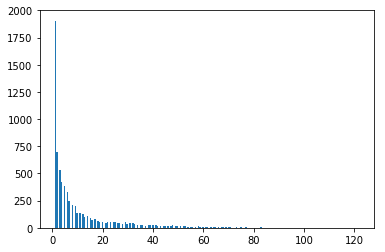

In [132]:
plt.hist(os1.umi_count_mhc.astype(int), bins=200)
plt.show()

In [18]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "beta", "gamma"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)
        
        print(param)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print(D)
        print(p)
        print("p value for "+dist_name+" = ", p)
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [19]:
get_best_distribution(os1.umi_count_mhc.astype(int).to_list())

(10.404443819434679, 14.218451667499687)
0.2541697990814662
0.0
p value for norm =  0.0
(1.457374466051407, 0.44386260667590427, 0.9999999999999999, 1.9677804291989076)
0.2678948108255718
0.0
p value for exponweib =  0.0
(0.35240140840328926, 146.3567895463828, 0.9999999999999999, 747.0333192877877)
0.3685481667964325
0.0
p value for beta =  0.0
(0.28910458438879083, 0.9999999999999998, 21.72550159767437)
0.2678811929672166
0.0
p value for gamma =  0.0
Best fitting distribution: norm
Best p value: 0.0
Parameters for the best fit: (10.404443819434679, 14.218451667499687)


('norm', 0.0, (10.404443819434679, 14.218451667499687))

In [20]:
n = st.norm(loc=10.404443819434679, scale=14.218451667499687)

In [21]:
st.kstest(os1.umi_count_mhc.astype(int).to_list(), n.cdf)

KstestResult(statistic=0.2541697990814662, pvalue=0.0)

In [176]:
bins = int(os2.delta_umi_cd8.max()+1) * 10
bins

11440

In [177]:
y,x = np.histogram(os2.delta_umi_cd8.dropna(), bins=bins, density=True)

In [179]:
y

array([0.05052946, 0.06890381, 0.08268457, ..., 0.        , 0.        ,
       0.00459359])

In [45]:
# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    #discrete = data.fillna(0).apply(float.is_integer).all()
    
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []
    
    #if discrete:
    #    print('discrete')
    #    distribution_collection = [d for d in dir(st) if isinstance(getattr(st, d), st.rv_discrete)]
    #else:
    #    print('continuous')
    #    distribution_collection = [d for d in dir(st) if isinstance(getattr(st, d), st.rv_continuous)]
    
    distribution_collection = [d for d in _distn_names if not d in ['levy_stable', 'studentized_range']] #+ ['norm2']
    #distribution_collection = [d for d in dir(st) if isinstance(getattr(st, d), st.rv_continuous)]
    
    min_sse = 9999
    
    # Estimate distribution parameters from data
    for ii, distribution_name in enumerate(distribution_collection):

        print("{:>3} / {:<3}: {}".format( ii+1, len(distribution_collection), distribution_name ))

        try:
            distribution = getattr(st, distribution_name)
        except AttributeError:
            distribution = norm2_gen(name='norm2')

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                #if discrete:
                #    pdf = distribution.pmf(x, loc=loc, *arg)
                #else:
                #    pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        if sse < min_sse:
                            min_sse = sse
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                #print(distribution_name, sse)
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    
    return sorted(best_distributions, key=lambda x:x[2])

In [46]:
def make_pdf(data, dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """
    
    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    #start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    #end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)
    
    start = 0
    end = np.ceil(data.max())+1

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [47]:
def plot_data(variable):
    xmin = 2
    xmax = os2[variable].quantile(0.8, interpolation='higher')
    data = os2.loc[(os2[variable] > xmin) & (os2[variable] < xmax), variable].dropna()
    
    # Plot for comparison
    #plt.figure(figsize=(12,8))
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
    data.plot(ax=ax1, kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

    # Save plot limits
    dataYLim = ax1.get_ylim()
    dataXLim = ax1.get_xlim()

    # Find best fit distribution
    if data.fillna(0).apply(float.is_integer).all():
        bins = int(data.max()+1)
    else:
        bins = int(data.max()+1) * 10
    best_distibutions = best_fit_distribution(data, bins, ax1)
    best_dist = best_distibutions[0]

    # Update plots
    ax1.set_ylim(dataYLim)
    ax1.set_title(u'All Fitted Distributions')
    ax1.set_xlabel(u'%s' %variable.replace('_',' '))
    ax1.set_ylabel('Frequency')

    # Make PDF with best params 
    pdf = make_pdf(data, best_dist[0], best_dist[1])

    # Display
    #plt.figure(figsize=(12,8))
    pdf.plot(ax=ax2, lw=2, label='PDF', legend=True)
    data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax2)

    param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
    param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
    dist_str = '{}({})'.format(best_dist[0].name, param_str)

    ax2.set_title(u'Best fit distribution \n%s' %dist_str)
    ax2.set_xlabel(u'%s' %variable.replace('_',' '))
    ax2.set_ylabel('Frequency')
    ax2.set_xlim(dataXLim) #dataXLim
    ax2.set_ylim(dataYLim)
    plt.suptitle('%s' %variable.replace('_',' '))
    plt.show()
    
    return best_dist[0].name, best_dist[1]

umi_count_mhc
  1 / 100: ksone
  2 / 100: kstwo
  3 / 100: kstwobign
  4 / 100: norm
  5 / 100: alpha
  6 / 100: anglit
  7 / 100: arcsine
  8 / 100: beta
  9 / 100: betaprime
 10 / 100: bradford
 11 / 100: burr
 12 / 100: burr12
 13 / 100: fisk
 14 / 100: cauchy
 15 / 100: chi
 16 / 100: chi2
 17 / 100: cosine
 18 / 100: dgamma
 19 / 100: dweibull
 20 / 100: expon
 21 / 100: exponnorm
 22 / 100: exponweib
 23 / 100: exponpow
 24 / 100: fatiguelife
 25 / 100: foldcauchy
 26 / 100: f
 27 / 100: foldnorm
 28 / 100: weibull_min
 29 / 100: weibull_max
 30 / 100: genlogistic
 31 / 100: genpareto
 32 / 100: genexpon
 33 / 100: genextreme
 34 / 100: gamma
 35 / 100: erlang
 36 / 100: gengamma
 37 / 100: genhalflogistic
 38 / 100: gompertz
 39 / 100: gumbel_r
 40 / 100: gumbel_l
 41 / 100: halfcauchy
 42 / 100: halflogistic
 43 / 100: halfnorm
 44 / 100: hypsecant
 45 / 100: gausshyper
 46 / 100: invgamma
 47 / 100: invgauss
 48 / 100: geninvgauss
 49 / 100: norminvgauss
 50 / 100: invweibull


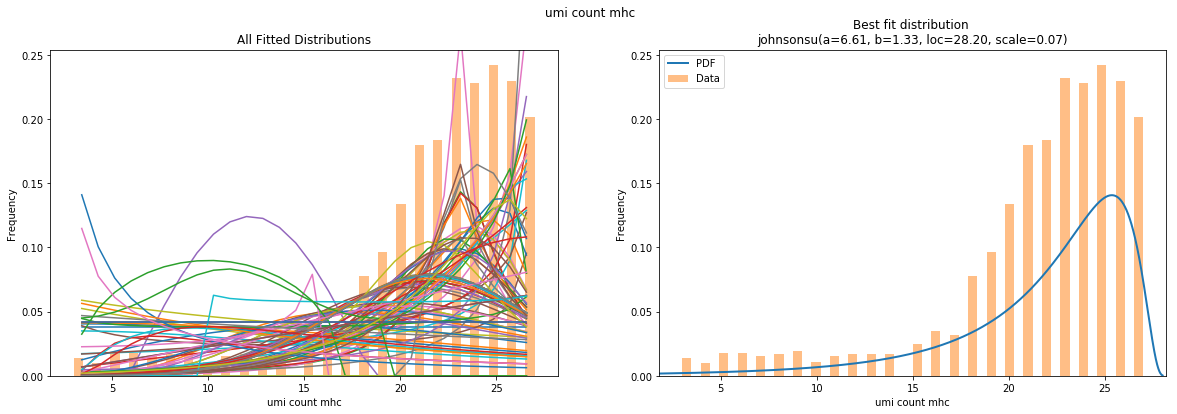

delta_umi_mhc
  1 / 100: ksone
  2 / 100: kstwo
  3 / 100: kstwobign
  4 / 100: norm
  5 / 100: alpha
  6 / 100: anglit
  7 / 100: arcsine
  8 / 100: beta
  9 / 100: betaprime
 10 / 100: bradford
 11 / 100: burr
 12 / 100: burr12
 13 / 100: fisk
 14 / 100: cauchy
 15 / 100: chi
 16 / 100: chi2
 17 / 100: cosine
 18 / 100: dgamma
 19 / 100: dweibull
 20 / 100: expon
 21 / 100: exponnorm
 22 / 100: exponweib
 23 / 100: exponpow
 24 / 100: fatiguelife
 25 / 100: foldcauchy
 26 / 100: f
 27 / 100: foldnorm
 28 / 100: weibull_min
 29 / 100: weibull_max
 30 / 100: genlogistic
 31 / 100: genpareto
 32 / 100: genexpon
 33 / 100: genextreme
 34 / 100: gamma
 35 / 100: erlang
 36 / 100: gengamma
 37 / 100: genhalflogistic
 38 / 100: gompertz
 39 / 100: gumbel_r
 40 / 100: gumbel_l
 41 / 100: halfcauchy
 42 / 100: halflogistic
 43 / 100: halfnorm
 44 / 100: hypsecant
 45 / 100: gausshyper
 46 / 100: invgamma
 47 / 100: invgauss
 48 / 100: geninvgauss
 49 / 100: norminvgauss
 50 / 100: invweibull


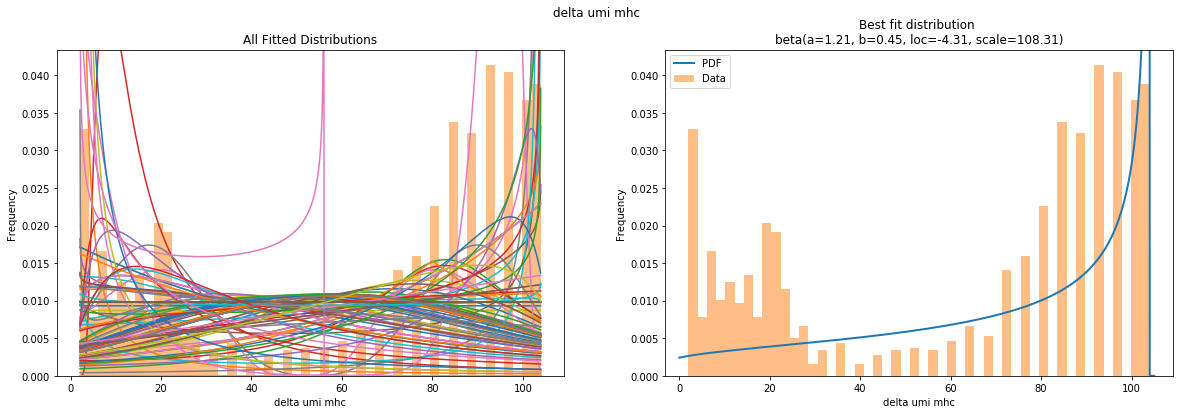

In [48]:
dct = dict()
for variable in ['umi_count_mhc','delta_umi_mhc']: #,'delta_umi_mhc','umi_count_cd8'
    print(variable)
    name, args = plot_data(variable)
    dct[variable] = [name, args]

In [9]:
class norm2_gen(st.rv_continuous):
    def _argcheck(self, *args):
        return True

    def _pdf(self, x, m, s, w, delta):
        phi = 0.5 + np.arctan(w)/np.pi
        return np.exp(-(x-m+delta/2)**2 / (2. * s**2)) / np.sqrt(2. * np.pi * s**2) * phi + \
               np.exp(-(x-m-delta/2)**2 / (2. * s**2)) / np.sqrt(2. * np.pi * s**2) * (1 - phi)

norm2 = norm2_gen(name='norm2')

In [30]:
np.exp(-10**2 / (2* 2**2))

3.726653172078671e-06

In [31]:
round(np.exp(-10**2 / (2* 2**2)), 8)

3.73e-06

In [39]:
round(3.45555)

3

In [10]:
dst = norm2.fit(os2.delta_umi_mhc)

In [11]:
dst

(7.516483806719898,
 0.8941988488397342,
 0.45961508281011265,
 -4.717886983864915,
 -79.42424702760255,
 18.03498130136058)

In [15]:
norm2 = norm2(*dst)

In [16]:
norm2

In [18]:
rng = np.random.RandomState(0)

In [19]:
norm2.rvs(random_state=rng)

89.84162761589673

In [184]:
data = os2.delta_umi_mhc

In [206]:
100000/ (100000+0.25)

0.99999750000625

In [208]:
1/(1+0.25)

0.8

In [185]:
data.describe()

count    2183.000000
mean       67.803756
std        43.985916
min         0.965517
25%        19.200000
50%        84.000000
75%       104.000000
max       156.000000
Name: delta_umi_mhc, dtype: float64

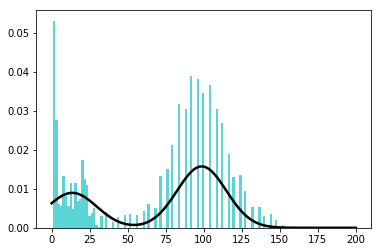

In [189]:
plt.hist(data, bins=100, density=True, color='c', alpha=0.65)
q = np.linspace(0, 200, 1000)
p = norm2.pdf(q, *dst)
#p1 = norm2.pdf(q, m1, s1, w1, fdelta)
plt.plot(q, p, 'k', linewidth=2.5)
#plt.plot(q, p1, 'k--', linewidth=2.5, label='delta=%6.2f (fixed)' % fdelta)
#plt.legend(loc='best')
plt.show()

In [192]:
getattr(norm2_gen, 'norm2')

AttributeError: type object 'norm2_gen' has no attribute 'norm2'

In [171]:
os2.delta_umi_cd8.max()

1143.3846153846157

In [109]:
from ast import literal_eval

In [128]:
dct = pd.read_csv('../experiments/exp13/run2/cat/eval_clonotypes/param_dist.csv', index_col=0, converters={'dist_args':literal_eval})

FileNotFoundError: [Errno 2] No such file or directory: '../experiments/exp13/run2/cat/eval_clonotypes/param_dist.csv'

In [122]:
dct

{'umi_count_mhc': ['mielke',
  (0.6155417277365036,
   0.5502570322464425,
   0.9999999999996814,
   0.4180514931727905)]}

In [111]:
name, args = dct.loc['umi_count_mhc']

In [112]:
dist = getattr(st, name)

In [113]:
dist = dist(*args)

In [123]:
dist = getattr(st,'mielke')(0.6155417277365036, 0.5502570322464425, 0.9999999999996814, 0.4180514931727905)

In [129]:
dist = getattr(st,'ksone')(1.31,-4.22,0.00)

In [130]:
dist

In [131]:

dist.rvs(size=1000000).min()

-4.22

# Main

  1 / 101: norm
  2 / 101: beta
  3 / 101: expon


(0.0, 0.19122393312188893)

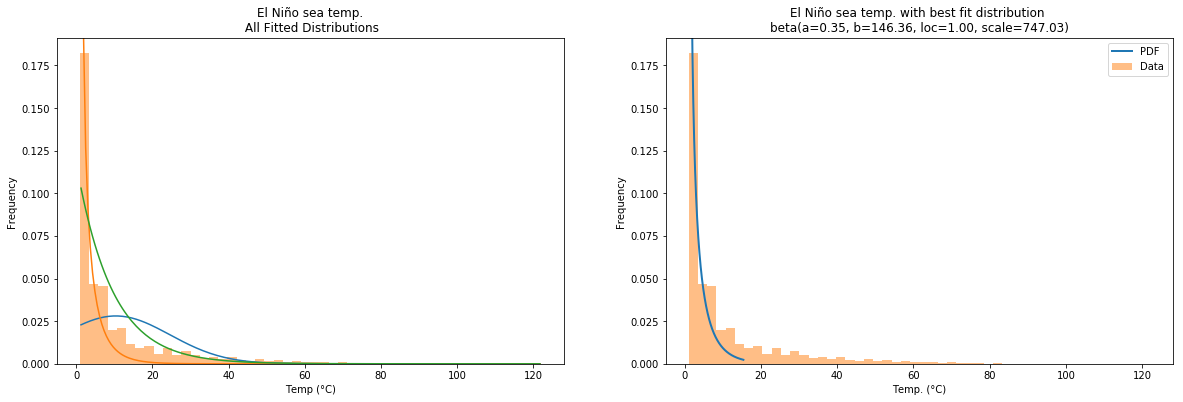

In [96]:
# Load data from statsmodels datasets
data = os1.umi_count_mhc.astype(int) #pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

# Plot for comparison
#plt.figure(figsize=(12,8))
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
data.plot(ax=ax1, kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax1.get_ylim()
dataXLim = ax1.get_xlim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax1)
best_dist = best_distibutions[0]

# Update plots
ax1.set_ylim(dataYLim)
ax1.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax1.set_xlabel(u'Temp (°C)')
ax1.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
#plt.figure(figsize=(12,8))
pdf.plot(ax=ax2, lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax2)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax2.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax2.set_xlabel(u'Temp. (°C)')
ax2.set_ylabel('Frequency')
ax2.set_xlim(dataXLim) #dataXLim
ax2.set_ylim(dataYLim)

In [101]:
best_dist

(<scipy.stats._continuous_distns.beta_gen at 0x7fbdd69a4c50>,
 (0.35240140840328926,
  146.3567895463828,
  0.9999999999999999,
  747.0333192877877),
 0.037987400820918255)

In [12]:
d = getattr(st,'beta')
d

In [15]:
d(*s.loc['umi_count_mhc', 'dist_args'])

In [6]:
a= d(0.35240140840328926, 146.3567895463828, 0.9999999999999999, 747.0333192877877)
a

In [7]:
getattr(st,'beta')(0.35240140840328926, 146.3567895463828, 0.9999999999999999, 747.0333192877877)

In [109]:
a.rvs(2)

array([5.79362729, 1.04136873])

In [47]:
from sklearn.model_selection import ParameterSampler

In [68]:
param_grid = {'a':[1, 2], 'b': lol}

In [69]:
rng = np.random.RandomState(0)
param_list = list(ParameterSampler(param_grid, n_iter=4, random_state=rng))

In [70]:
[dict((k, round(v, 0)) for (k, v) in d.items()) for d in param_list]

[{'a': 1, 'b': 2.0},
 {'a': 1, 'b': 2.0},
 {'a': 2, 'b': 13.0},
 {'a': 2, 'b': 3.0}]

In [67]:
lol = best_dist[0](0.6155417277365036, 0.5502570322464425, 0.9999999999996814, 0.4180514931727905)

In [62]:
best_dist[0].pdf(0.6155417277365036, 0.5502570322464425, 0.9999999999996814, 0.4180514931727905)

0.8630725703508069

In [55]:
tmp = st.mielke(0.6155417277365036, 0.5502570322464425, 0.9999999999996814, 0.4180514931727905)

In [32]:
n = st.norm(5,2)

In [41]:
a = tmp.rvs(size=3)
a

array([ 1.01508021, 78.38892752,  1.00870914])

In [42]:
np.ceil(a)

array([ 2., 79.,  2.])

In [85]:
best_distibutions

[(<scipy.stats._continuous_distns.beta_gen at 0x7fbdd69a4c50>,
  (0.35240140840328926,
   146.3567895463828,
   0.9999999999999999,
   747.0333192877877),
  0.037987400820918255),
 (<scipy.stats._continuous_distns.expon_gen at 0x7fbdd780c748>,
  (1.0, 9.404443819434679),
  0.1519457165764605),
 (<scipy.stats._continuous_distns.norm_gen at 0x7fbdd69a46a0>,
  (10.404443819434679, 14.218451667499687),
  0.23011939388907457)]